[View in Colaboratory](https://colab.research.google.com/github/diazero/jihoon_hw/blob/master/proj_3CONV.ipynb)

In [182]:
# if you want to remove variables
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [207]:
# check the GPU connection
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [208]:
# Library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plot
import matplotlib.image as mpimg # plot
import os # to check the files in the directory

# deep learning library
import tensorflow as tf
from tensorflow.python.framework import ops
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Lambda
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.utils import to_categorical
from keras.optimizers import Adam


In [150]:
# Upload the dataset into the local folder in colaboratory
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [209]:
# load the data from the csv file
df = pd.DataFrame(pd.read_csv('fashion-mnist_train.csv'))
df_test = pd.DataFrame(pd.read_csv('fashion-mnist_test.csv'))


In [210]:
# from the loaded data, assign them to train image/label and test image/label
TRAINING_SIZE = 60000

train_label = df.loc[:TRAINING_SIZE - 1, 'label']
train_label = to_categorical(train_label, num_classes=10)

train_img = df.iloc[:TRAINING_SIZE, 1:785]

test_label = df_test.loc[:, 'label']
test_label = to_categorical(test_label, num_classes=10)

test_img = df_test.iloc[:, 1:785]

In [211]:
# check the shape of the variable
print("Fashion MNIST:")
print("Training set (images) shape: {shape}".format(shape=train_img.shape))
print("Training set (labels) shape: {shape}".format(shape=train_label.shape))
print("Test set (images) shape: {shape}".format(shape=test_img.shape))
print("Test set (labels) shape: {shape}".format(shape=test_label.shape))


Fashion MNIST:
Training set (images) shape: (60000, 784)
Training set (labels) shape: (60000, 10)
Test set (images) shape: (10000, 784)
Test set (labels) shape: (10000, 10)


In [212]:
# Dictionary of labels
label_dict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}


y = 8 (Bag)


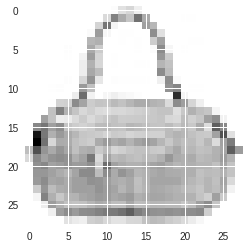

y = 5 (Sandal)


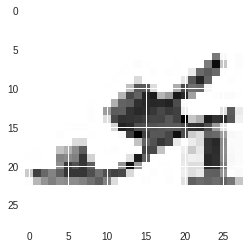

In [213]:
# Get random images and associated label
type(train_img)
sample_1 = (train_img.iloc[20]).values.reshape(28,28)
sample_label_1 = np.where(train_label[20] == 1)[0][0]

sample_2 = (train_img.iloc[50]).values.reshape(28,28)
sample_label_2 = np.where(train_label[50] == 1)[0][0]

# Show images and labels
print("y = {label_index} ({label})".format(label_index=sample_label_1, label=label_dict[sample_label_1]))
plt.imshow(sample_1, cmap='Greys')
plt.show()

print("y = {label_index} ({label})".format(label_index=sample_label_2, label=label_dict[sample_label_2]))
plt.imshow(sample_2, cmap='Greys')
plt.show()

In [214]:
# Network parameters
batch_size = 512
epoch_size = 500
learning_rate = 0.0001

In [215]:
# from the training image, split it to train image and validation image
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_img, train_label, test_size=0.2, random_state=12345)

In [216]:
# normalize the value
X_train = np.asarray(X_train/255)
X_val = np.asarray(X_val/255)
X_test = np.asarray(test_img/255)
y_test = test_label

In [217]:
# define 3NN network
model_3NN = Sequential([
    Dense(512, input_shape=(784,), activation='relu'),
    Dense(128, activation = 'relu'),
    Dense(10, activation='softmax')
])

In [218]:
# check 3NN network
model_3NN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_43 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_44 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [219]:
# set the optimizer, loss and metric
model_3NN.compile(optimizer=Adam(lr=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [220]:
# train the network and save the metrics to history
history_3NN = model_3NN.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epoch_size,
                    verbose=1,
                    validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/500
48000/48000 [==============================] - 3s 62us/step - loss: 1.1571 - acc: 0.6552 - val_loss: 0.6792 - val_acc: 0.7862
Epoch 2/500
48000/48000 [==============================] - 2s 42us/step - loss: 0.5924 - acc: 0.8105 - val_loss: 0.5319 - val_acc: 0.8246
Epoch 3/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.5044 - acc: 0.8324 - val_loss: 0.4803 - val_acc: 0.8369
Epoch 4/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.4630 - acc: 0.8428 - val_loss: 0.4489 - val_acc: 0.8474
Epoch 5/500
48000/48000 [==============================] - 2s 45us/step - loss: 0.4376 - acc: 0.8510 - val_loss: 0.4283 - val_acc: 0.8546
Epoch 6/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.4163 - acc: 0.8576 - val_loss: 0.4141 - val_acc: 0.8592
Epoch 7/500
  512/48000 [..............................] - ETA: 2s - loss: 0.4314 - acc: 0.8535

48000/48000 [==============================] - 2s 42us/step - loss: 0.4013 - acc: 0.8609 - val_loss: 0.4009 - val_acc: 0.8630
Epoch 8/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.3879 - acc: 0.8659 - val_loss: 0.3950 - val_acc: 0.8660
Epoch 9/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.3762 - acc: 0.8699 - val_loss: 0.3812 - val_acc: 0.8692
Epoch 10/500
48000/48000 [==============================] - 2s 42us/step - loss: 0.3657 - acc: 0.8734 - val_loss: 0.3758 - val_acc: 0.8718
Epoch 11/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.3584 - acc: 0.8749 - val_loss: 0.3660 - val_acc: 0.8728
Epoch 12/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.3492 - acc: 0.8779 - val_loss: 0.3638 - val_acc: 0.8738
Epoch 13/500
18432/48000 [==========>...................] - ETA: 1s - loss: 0.3468 - acc: 0.8799

48000/48000 [==============================] - 2s 44us/step - loss: 0.3424 - acc: 0.8811 - val_loss: 0.3554 - val_acc: 0.8772
Epoch 14/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.3369 - acc: 0.8824 - val_loss: 0.3501 - val_acc: 0.8777
Epoch 15/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.3290 - acc: 0.8855 - val_loss: 0.3523 - val_acc: 0.8753
Epoch 16/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.3238 - acc: 0.8862 - val_loss: 0.3483 - val_acc: 0.8788
Epoch 17/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.3172 - acc: 0.8888 - val_loss: 0.3378 - val_acc: 0.8801
Epoch 18/500
48000/48000 [==============================] - 2s 45us/step - loss: 0.3136 - acc: 0.8900 - val_loss: 0.3389 - val_acc: 0.8817
Epoch 19/500
17920/48000 [==========>...................] - ETA: 1s - loss: 0.3114 - acc: 0.8891

48000/48000 [==============================] - 2s 45us/step - loss: 0.3073 - acc: 0.8916 - val_loss: 0.3315 - val_acc: 0.8835
Epoch 20/500
48000/48000 [==============================] - 2s 45us/step - loss: 0.3046 - acc: 0.8924 - val_loss: 0.3293 - val_acc: 0.8838
Epoch 21/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.2982 - acc: 0.8946 - val_loss: 0.3263 - val_acc: 0.8844
Epoch 22/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.2943 - acc: 0.8961 - val_loss: 0.3237 - val_acc: 0.8852
Epoch 23/500
48000/48000 [==============================] - 2s 42us/step - loss: 0.2888 - acc: 0.8983 - val_loss: 0.3215 - val_acc: 0.8848
Epoch 24/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.2852 - acc: 0.8994 - val_loss: 0.3230 - val_acc: 0.8867
Epoch 25/500
24576/48000 [==============>...............] - ETA: 0s - loss: 0.2855 - acc: 0.8991

48000/48000 [==============================] - 2s 43us/step - loss: 0.2816 - acc: 0.9007 - val_loss: 0.3211 - val_acc: 0.8850
Epoch 26/500
48000/48000 [==============================] - 2s 42us/step - loss: 0.2780 - acc: 0.9012 - val_loss: 0.3156 - val_acc: 0.8873
Epoch 27/500
48000/48000 [==============================] - 2s 42us/step - loss: 0.2739 - acc: 0.9030 - val_loss: 0.3152 - val_acc: 0.8883
Epoch 28/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.2698 - acc: 0.9050 - val_loss: 0.3132 - val_acc: 0.8867
Epoch 29/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.2659 - acc: 0.9063 - val_loss: 0.3098 - val_acc: 0.8918
Epoch 30/500
48000/48000 [==============================] - 2s 42us/step - loss: 0.2633 - acc: 0.9090 - val_loss: 0.3095 - val_acc: 0.8908
Epoch 31/500
25088/48000 [==============>...............] - ETA: 0s - loss: 0.2642 - acc: 0.9062

48000/48000 [==============================] - 2s 43us/step - loss: 0.2633 - acc: 0.9068 - val_loss: 0.3128 - val_acc: 0.8878
Epoch 32/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.2580 - acc: 0.9098 - val_loss: 0.3160 - val_acc: 0.8856
Epoch 33/500
48000/48000 [==============================] - 2s 45us/step - loss: 0.2558 - acc: 0.9099 - val_loss: 0.3044 - val_acc: 0.8914
Epoch 34/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.2513 - acc: 0.9120 - val_loss: 0.3038 - val_acc: 0.8927
Epoch 35/500
48000/48000 [==============================] - 2s 45us/step - loss: 0.2498 - acc: 0.9113 - val_loss: 0.3123 - val_acc: 0.8886
Epoch 36/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.2470 - acc: 0.9134 - val_loss: 0.3082 - val_acc: 0.8923
Epoch 37/500
18944/48000 [==========>...................] - ETA: 1s - loss: 0.2427 - acc: 0.9161

48000/48000 [==============================] - 2s 43us/step - loss: 0.2420 - acc: 0.9148 - val_loss: 0.3011 - val_acc: 0.8935
Epoch 38/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.2407 - acc: 0.9154 - val_loss: 0.3081 - val_acc: 0.8920
Epoch 39/500
48000/48000 [==============================] - 2s 42us/step - loss: 0.2357 - acc: 0.9180 - val_loss: 0.3076 - val_acc: 0.8881
Epoch 40/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.2327 - acc: 0.9190 - val_loss: 0.3003 - val_acc: 0.8913
Epoch 41/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.2309 - acc: 0.9201 - val_loss: 0.3006 - val_acc: 0.8947
Epoch 42/500
48000/48000 [==============================] - 2s 42us/step - loss: 0.2282 - acc: 0.9206 - val_loss: 0.3051 - val_acc: 0.8893
Epoch 43/500
23552/48000 [=============>................] - ETA: 0s - loss: 0.2293 - acc: 0.9181

48000/48000 [==============================] - 2s 42us/step - loss: 0.2297 - acc: 0.9188 - val_loss: 0.3036 - val_acc: 0.8930
Epoch 44/500
48000/48000 [==============================] - 2s 42us/step - loss: 0.2257 - acc: 0.9212 - val_loss: 0.3001 - val_acc: 0.8945
Epoch 45/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.2215 - acc: 0.9231 - val_loss: 0.2958 - val_acc: 0.8937
Epoch 46/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.2201 - acc: 0.9236 - val_loss: 0.3203 - val_acc: 0.8875
Epoch 47/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.2188 - acc: 0.9231 - val_loss: 0.2966 - val_acc: 0.8967
Epoch 48/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.2137 - acc: 0.9252 - val_loss: 0.3032 - val_acc: 0.8953
Epoch 49/500
22528/48000 [=============>................] - ETA: 1s - loss: 0.2107 - acc: 0.9275

48000/48000 [==============================] - 2s 44us/step - loss: 0.2147 - acc: 0.9255 - val_loss: 0.2924 - val_acc: 0.8968
Epoch 50/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.2092 - acc: 0.9283 - val_loss: 0.2931 - val_acc: 0.8963
Epoch 51/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.2077 - acc: 0.9280 - val_loss: 0.2933 - val_acc: 0.8970
Epoch 52/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.2049 - acc: 0.9288 - val_loss: 0.2937 - val_acc: 0.8966
Epoch 53/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.2048 - acc: 0.9292 - val_loss: 0.2983 - val_acc: 0.8939
Epoch 54/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.2020 - acc: 0.9299 - val_loss: 0.2901 - val_acc: 0.8961
Epoch 55/500
22016/48000 [============>.................] - ETA: 1s - loss: 0.1957 - acc: 0.9344

48000/48000 [==============================] - 2s 42us/step - loss: 0.1978 - acc: 0.9317 - val_loss: 0.3079 - val_acc: 0.8883
Epoch 56/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.1988 - acc: 0.9309 - val_loss: 0.2996 - val_acc: 0.8963
Epoch 57/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.1953 - acc: 0.9334 - val_loss: 0.2965 - val_acc: 0.8973
Epoch 58/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.1937 - acc: 0.9327 - val_loss: 0.2975 - val_acc: 0.8951
Epoch 59/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.1922 - acc: 0.9342 - val_loss: 0.2936 - val_acc: 0.8947
Epoch 60/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.1885 - acc: 0.9354 - val_loss: 0.2963 - val_acc: 0.8955
Epoch 61/500
25600/48000 [===============>..............] - ETA: 0s - loss: 0.1875 - acc: 0.9354

48000/48000 [==============================] - 2s 44us/step - loss: 0.1875 - acc: 0.9356 - val_loss: 0.2942 - val_acc: 0.8976
Epoch 62/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.1875 - acc: 0.9350 - val_loss: 0.2926 - val_acc: 0.8958
Epoch 63/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.1841 - acc: 0.9361 - val_loss: 0.2893 - val_acc: 0.8984
Epoch 64/500
48000/48000 [==============================] - 2s 45us/step - loss: 0.1809 - acc: 0.9377 - val_loss: 0.2925 - val_acc: 0.8965
Epoch 65/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.1783 - acc: 0.9391 - val_loss: 0.2895 - val_acc: 0.8976
Epoch 66/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.1777 - acc: 0.9388 - val_loss: 0.2918 - val_acc: 0.8973
Epoch 67/500
20480/48000 [===========>..................] - ETA: 1s - loss: 0.1749 - acc: 0.9399

48000/48000 [==============================] - 2s 42us/step - loss: 0.1753 - acc: 0.9407 - val_loss: 0.2968 - val_acc: 0.8970
Epoch 68/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.1751 - acc: 0.9405 - val_loss: 0.2939 - val_acc: 0.8976
Epoch 69/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.1727 - acc: 0.9414 - val_loss: 0.2918 - val_acc: 0.8969
Epoch 70/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.1690 - acc: 0.9433 - val_loss: 0.2910 - val_acc: 0.8970
Epoch 71/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.1690 - acc: 0.9423 - val_loss: 0.2908 - val_acc: 0.8986
Epoch 72/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.1663 - acc: 0.9442 - val_loss: 0.2971 - val_acc: 0.8987
Epoch 73/500
25088/48000 [==============>...............] - ETA: 0s - loss: 0.1641 - acc: 0.9444

48000/48000 [==============================] - 2s 42us/step - loss: 0.1661 - acc: 0.9436 - val_loss: 0.2909 - val_acc: 0.8998
Epoch 74/500
48000/48000 [==============================] - 2s 42us/step - loss: 0.1655 - acc: 0.9439 - val_loss: 0.2930 - val_acc: 0.8972
Epoch 75/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.1614 - acc: 0.9459 - val_loss: 0.2915 - val_acc: 0.8984
Epoch 76/500
48000/48000 [==============================] - 2s 45us/step - loss: 0.1600 - acc: 0.9463 - val_loss: 0.2923 - val_acc: 0.9000
Epoch 77/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.1569 - acc: 0.9474 - val_loss: 0.2918 - val_acc: 0.8994
Epoch 78/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.1551 - acc: 0.9490 - val_loss: 0.2972 - val_acc: 0.8957
Epoch 79/500
15872/48000 [========>.....................] - ETA: 1s - loss: 0.1563 - acc: 0.9470

48000/48000 [==============================] - 2s 43us/step - loss: 0.1556 - acc: 0.9475 - val_loss: 0.2992 - val_acc: 0.8977
Epoch 80/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.1540 - acc: 0.9487 - val_loss: 0.2924 - val_acc: 0.8996
Epoch 81/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.1518 - acc: 0.9505 - val_loss: 0.2918 - val_acc: 0.8997
Epoch 82/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.1486 - acc: 0.9501 - val_loss: 0.2987 - val_acc: 0.8962
Epoch 83/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.1518 - acc: 0.9491 - val_loss: 0.2933 - val_acc: 0.8974
Epoch 84/500
48000/48000 [==============================] - 2s 42us/step - loss: 0.1460 - acc: 0.9529 - val_loss: 0.3014 - val_acc: 0.8963
Epoch 85/500
25600/48000 [===============>..............] - ETA: 0s - loss: 0.1433 - acc: 0.9540

48000/48000 [==============================] - 2s 43us/step - loss: 0.1454 - acc: 0.9528 - val_loss: 0.3042 - val_acc: 0.8967
Epoch 86/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.1449 - acc: 0.9522 - val_loss: 0.3035 - val_acc: 0.8967
Epoch 87/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.1431 - acc: 0.9528 - val_loss: 0.2985 - val_acc: 0.8958
Epoch 88/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.1397 - acc: 0.9549 - val_loss: 0.3015 - val_acc: 0.8971
Epoch 89/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.1416 - acc: 0.9539 - val_loss: 0.2994 - val_acc: 0.8984
Epoch 90/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.1376 - acc: 0.9558 - val_loss: 0.2962 - val_acc: 0.8988
Epoch 91/500
21504/48000 [============>.................] - ETA: 1s - loss: 0.1296 - acc: 0.9596

48000/48000 [==============================] - 2s 45us/step - loss: 0.1350 - acc: 0.9565 - val_loss: 0.2970 - val_acc: 0.8990
Epoch 92/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.1366 - acc: 0.9553 - val_loss: 0.3014 - val_acc: 0.8982
Epoch 93/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.1330 - acc: 0.9581 - val_loss: 0.3043 - val_acc: 0.8963
Epoch 94/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.1312 - acc: 0.9585 - val_loss: 0.3088 - val_acc: 0.8952
Epoch 95/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.1307 - acc: 0.9587 - val_loss: 0.3068 - val_acc: 0.8974
Epoch 96/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.1292 - acc: 0.9581 - val_loss: 0.3025 - val_acc: 0.8991
Epoch 97/500
20480/48000 [===========>..................] - ETA: 1s - loss: 0.1257 - acc: 0.9610

48000/48000 [==============================] - 2s 44us/step - loss: 0.1265 - acc: 0.9600 - val_loss: 0.3045 - val_acc: 0.8988
Epoch 98/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.1298 - acc: 0.9580 - val_loss: 0.3083 - val_acc: 0.8972
Epoch 99/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.1257 - acc: 0.9598 - val_loss: 0.3061 - val_acc: 0.8977
Epoch 100/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.1242 - acc: 0.9603 - val_loss: 0.3109 - val_acc: 0.8954
Epoch 101/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.1215 - acc: 0.9612 - val_loss: 0.3036 - val_acc: 0.8997
Epoch 102/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.1197 - acc: 0.9620 - val_loss: 0.3087 - val_acc: 0.8987
Epoch 103/500
25088/48000 [==============>...............] - ETA: 0s - loss: 0.1164 - acc: 0.9630

48000/48000 [==============================] - 2s 43us/step - loss: 0.1196 - acc: 0.9617 - val_loss: 0.3094 - val_acc: 0.8968
Epoch 104/500
48000/48000 [==============================] - 2s 45us/step - loss: 0.1198 - acc: 0.9620 - val_loss: 0.3072 - val_acc: 0.8977
Epoch 105/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.1153 - acc: 0.9640 - val_loss: 0.3063 - val_acc: 0.8977
Epoch 106/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.1154 - acc: 0.9641 - val_loss: 0.3128 - val_acc: 0.8991
Epoch 107/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.1143 - acc: 0.9644 - val_loss: 0.3105 - val_acc: 0.8961
Epoch 108/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.1121 - acc: 0.9650 - val_loss: 0.3077 - val_acc: 0.8988
Epoch 109/500
17408/48000 [=========>....................] - ETA: 1s - loss: 0.1115 - acc: 0.9655

48000/48000 [==============================] - 2s 43us/step - loss: 0.1104 - acc: 0.9659 - val_loss: 0.3084 - val_acc: 0.8986
Epoch 110/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.1107 - acc: 0.9660 - val_loss: 0.3074 - val_acc: 0.9009
Epoch 111/500
48000/48000 [==============================] - 2s 42us/step - loss: 0.1089 - acc: 0.9661 - val_loss: 0.3102 - val_acc: 0.8998
Epoch 112/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.1070 - acc: 0.9676 - val_loss: 0.3138 - val_acc: 0.9003
Epoch 113/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.1075 - acc: 0.9670 - val_loss: 0.3119 - val_acc: 0.8993
Epoch 114/500
48000/48000 [==============================] - 2s 42us/step - loss: 0.1043 - acc: 0.9680 - val_loss: 0.3134 - val_acc: 0.8985
Epoch 115/500
25088/48000 [==============>...............] - ETA: 0s - loss: 0.1010 - acc: 0.9692

48000/48000 [==============================] - 2s 43us/step - loss: 0.1031 - acc: 0.9682 - val_loss: 0.3223 - val_acc: 0.8989
Epoch 116/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.1041 - acc: 0.9677 - val_loss: 0.3175 - val_acc: 0.8991
Epoch 117/500
48000/48000 [==============================] - 2s 45us/step - loss: 0.1025 - acc: 0.9685 - val_loss: 0.3262 - val_acc: 0.8992
Epoch 118/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.1017 - acc: 0.9688 - val_loss: 0.3247 - val_acc: 0.8988
Epoch 119/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.1013 - acc: 0.9683 - val_loss: 0.3232 - val_acc: 0.8988
Epoch 120/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0996 - acc: 0.9694 - val_loss: 0.3182 - val_acc: 0.9000
Epoch 121/500
21504/48000 [============>.................] - ETA: 1s - loss: 0.1011 - acc: 0.9700

48000/48000 [==============================] - 2s 43us/step - loss: 0.0980 - acc: 0.9697 - val_loss: 0.3194 - val_acc: 0.8995
Epoch 122/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0958 - acc: 0.9718 - val_loss: 0.3287 - val_acc: 0.8973
Epoch 123/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0949 - acc: 0.9713 - val_loss: 0.3207 - val_acc: 0.8990
Epoch 124/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0922 - acc: 0.9726 - val_loss: 0.3316 - val_acc: 0.8968
Epoch 125/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0922 - acc: 0.9725 - val_loss: 0.3253 - val_acc: 0.8995
Epoch 126/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0900 - acc: 0.9737 - val_loss: 0.3309 - val_acc: 0.8961
Epoch 127/500
23040/48000 [=============>................] - ETA: 1s - loss: 0.0902 - acc: 0.9730

48000/48000 [==============================] - 2s 43us/step - loss: 0.0912 - acc: 0.9730 - val_loss: 0.3421 - val_acc: 0.8971
Epoch 128/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0885 - acc: 0.9742 - val_loss: 0.3291 - val_acc: 0.8982
Epoch 129/500
48000/48000 [==============================] - 2s 42us/step - loss: 0.0897 - acc: 0.9729 - val_loss: 0.3268 - val_acc: 0.8974
Epoch 130/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0871 - acc: 0.9747 - val_loss: 0.3305 - val_acc: 0.8991
Epoch 131/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0893 - acc: 0.9732 - val_loss: 0.3427 - val_acc: 0.8937
Epoch 132/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0867 - acc: 0.9746 - val_loss: 0.3310 - val_acc: 0.8995
Epoch 133/500
19968/48000 [===========>..................] - ETA: 1s - loss: 0.0830 - acc: 0.9764

48000/48000 [==============================] - 2s 44us/step - loss: 0.0846 - acc: 0.9753 - val_loss: 0.3294 - val_acc: 0.8996
Epoch 134/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0827 - acc: 0.9765 - val_loss: 0.3398 - val_acc: 0.8953
Epoch 135/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0812 - acc: 0.9765 - val_loss: 0.3359 - val_acc: 0.8952
Epoch 136/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0835 - acc: 0.9752 - val_loss: 0.3617 - val_acc: 0.8924
Epoch 137/500
48000/48000 [==============================] - 2s 42us/step - loss: 0.0823 - acc: 0.9755 - val_loss: 0.3352 - val_acc: 0.8987
Epoch 138/500
48000/48000 [==============================] - 2s 42us/step - loss: 0.0780 - acc: 0.9775 - val_loss: 0.3385 - val_acc: 0.8998
Epoch 139/500
22016/48000 [============>.................] - ETA: 1s - loss: 0.0767 - acc: 0.9786

48000/48000 [==============================] - 2s 43us/step - loss: 0.0775 - acc: 0.9782 - val_loss: 0.3362 - val_acc: 0.8974
Epoch 140/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0772 - acc: 0.9785 - val_loss: 0.3385 - val_acc: 0.8987
Epoch 141/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0751 - acc: 0.9791 - val_loss: 0.3443 - val_acc: 0.8978
Epoch 142/500
48000/48000 [==============================] - 2s 42us/step - loss: 0.0760 - acc: 0.9784 - val_loss: 0.3481 - val_acc: 0.8928
Epoch 143/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0751 - acc: 0.9793 - val_loss: 0.3440 - val_acc: 0.8978
Epoch 144/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0750 - acc: 0.9783 - val_loss: 0.3514 - val_acc: 0.8965
Epoch 145/500
22016/48000 [============>.................] - ETA: 1s - loss: 0.0670 - acc: 0.9829

48000/48000 [==============================] - 2s 43us/step - loss: 0.0717 - acc: 0.9804 - val_loss: 0.3418 - val_acc: 0.8988
Epoch 146/500
48000/48000 [==============================] - 2s 42us/step - loss: 0.0715 - acc: 0.9801 - val_loss: 0.3488 - val_acc: 0.8967
Epoch 147/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0716 - acc: 0.9804 - val_loss: 0.3501 - val_acc: 0.8966
Epoch 148/500
48000/48000 [==============================] - 2s 45us/step - loss: 0.0695 - acc: 0.9810 - val_loss: 0.3495 - val_acc: 0.8963
Epoch 149/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0705 - acc: 0.9806 - val_loss: 0.3493 - val_acc: 0.8965
Epoch 150/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0702 - acc: 0.9798 - val_loss: 0.3642 - val_acc: 0.8953
Epoch 151/500
18432/48000 [==========>...................] - ETA: 1s - loss: 0.0649 - acc: 0.9832

48000/48000 [==============================] - 2s 44us/step - loss: 0.0670 - acc: 0.9821 - val_loss: 0.3504 - val_acc: 0.8974
Epoch 152/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0666 - acc: 0.9824 - val_loss: 0.3536 - val_acc: 0.8961
Epoch 153/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0652 - acc: 0.9832 - val_loss: 0.3635 - val_acc: 0.8971
Epoch 154/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0647 - acc: 0.9831 - val_loss: 0.3546 - val_acc: 0.8987
Epoch 155/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0640 - acc: 0.9831 - val_loss: 0.3537 - val_acc: 0.8984
Epoch 156/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0619 - acc: 0.9843 - val_loss: 0.3595 - val_acc: 0.8975
Epoch 157/500
20480/48000 [===========>..................] - ETA: 1s - loss: 0.0628 - acc: 0.9834

48000/48000 [==============================] - 2s 43us/step - loss: 0.0626 - acc: 0.9836 - val_loss: 0.3580 - val_acc: 0.8977
Epoch 158/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0630 - acc: 0.9826 - val_loss: 0.3560 - val_acc: 0.8975
Epoch 159/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0593 - acc: 0.9849 - val_loss: 0.3590 - val_acc: 0.8978
Epoch 160/500
48000/48000 [==============================] - 2s 42us/step - loss: 0.0605 - acc: 0.9837 - val_loss: 0.3774 - val_acc: 0.8941
Epoch 161/500
48000/48000 [==============================] - 2s 42us/step - loss: 0.0590 - acc: 0.9853 - val_loss: 0.3615 - val_acc: 0.8976
Epoch 162/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0585 - acc: 0.9841 - val_loss: 0.3617 - val_acc: 0.8953
Epoch 163/500
24576/48000 [==============>...............] - ETA: 0s - loss: 0.0551 - acc: 0.9870

48000/48000 [==============================] - 2s 44us/step - loss: 0.0566 - acc: 0.9861 - val_loss: 0.3681 - val_acc: 0.8951
Epoch 164/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0589 - acc: 0.9842 - val_loss: 0.3670 - val_acc: 0.8973
Epoch 165/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0553 - acc: 0.9862 - val_loss: 0.3704 - val_acc: 0.8987
Epoch 166/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0565 - acc: 0.9850 - val_loss: 0.3708 - val_acc: 0.8962
Epoch 167/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0534 - acc: 0.9867 - val_loss: 0.3755 - val_acc: 0.8955
Epoch 168/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0536 - acc: 0.9863 - val_loss: 0.3713 - val_acc: 0.8962
Epoch 169/500
19968/48000 [===========>..................] - ETA: 1s - loss: 0.0517 - acc: 0.9876

48000/48000 [==============================] - 2s 43us/step - loss: 0.0531 - acc: 0.9870 - val_loss: 0.3720 - val_acc: 0.8975
Epoch 170/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0531 - acc: 0.9864 - val_loss: 0.3712 - val_acc: 0.8976
Epoch 171/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0536 - acc: 0.9864 - val_loss: 0.3790 - val_acc: 0.8976
Epoch 172/500
48000/48000 [==============================] - 2s 45us/step - loss: 0.0501 - acc: 0.9878 - val_loss: 0.3770 - val_acc: 0.8975
Epoch 173/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0502 - acc: 0.9871 - val_loss: 0.3753 - val_acc: 0.8959
Epoch 174/500
48000/48000 [==============================] - 2s 42us/step - loss: 0.0491 - acc: 0.9881 - val_loss: 0.3860 - val_acc: 0.8940
Epoch 175/500
23552/48000 [=============>................] - ETA: 0s - loss: 0.0456 - acc: 0.9900

48000/48000 [==============================] - 2s 42us/step - loss: 0.0483 - acc: 0.9883 - val_loss: 0.3939 - val_acc: 0.8958
Epoch 176/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0489 - acc: 0.9881 - val_loss: 0.3885 - val_acc: 0.8962
Epoch 177/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0484 - acc: 0.9878 - val_loss: 0.3812 - val_acc: 0.8972
Epoch 178/500
48000/48000 [==============================] - 2s 45us/step - loss: 0.0473 - acc: 0.9883 - val_loss: 0.3845 - val_acc: 0.8946
Epoch 179/500
48000/48000 [==============================] - 2s 45us/step - loss: 0.0465 - acc: 0.9885 - val_loss: 0.3891 - val_acc: 0.8962
Epoch 180/500
48000/48000 [==============================] - 2s 46us/step - loss: 0.0461 - acc: 0.9891 - val_loss: 0.3959 - val_acc: 0.8963
Epoch 181/500
15872/48000 [========>.....................] - ETA: 1s - loss: 0.0439 - acc: 0.9892

48000/48000 [==============================] - 2s 44us/step - loss: 0.0456 - acc: 0.9888 - val_loss: 0.3882 - val_acc: 0.8975
Epoch 182/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0434 - acc: 0.9905 - val_loss: 0.3900 - val_acc: 0.8962
Epoch 183/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0422 - acc: 0.9909 - val_loss: 0.3936 - val_acc: 0.8965
Epoch 184/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0424 - acc: 0.9904 - val_loss: 0.3948 - val_acc: 0.8982
Epoch 185/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0428 - acc: 0.9899 - val_loss: 0.3962 - val_acc: 0.8953
Epoch 186/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0432 - acc: 0.9895 - val_loss: 0.3988 - val_acc: 0.8965
Epoch 187/500
18432/48000 [==========>...................] - ETA: 1s - loss: 0.0422 - acc: 0.9900

48000/48000 [==============================] - 2s 43us/step - loss: 0.0401 - acc: 0.9913 - val_loss: 0.3953 - val_acc: 0.8958
Epoch 188/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0393 - acc: 0.9916 - val_loss: 0.4034 - val_acc: 0.8959
Epoch 189/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0406 - acc: 0.9907 - val_loss: 0.4054 - val_acc: 0.8932
Epoch 190/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0399 - acc: 0.9911 - val_loss: 0.4090 - val_acc: 0.8937
Epoch 191/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0381 - acc: 0.9921 - val_loss: 0.4034 - val_acc: 0.8968
Epoch 192/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0387 - acc: 0.9913 - val_loss: 0.4110 - val_acc: 0.8950
Epoch 193/500
19456/48000 [===========>..................] - ETA: 1s - loss: 0.0366 - acc: 0.9924

48000/48000 [==============================] - 2s 44us/step - loss: 0.0393 - acc: 0.9907 - val_loss: 0.4089 - val_acc: 0.8948
Epoch 194/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0367 - acc: 0.9921 - val_loss: 0.4064 - val_acc: 0.8958
Epoch 195/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0355 - acc: 0.9926 - val_loss: 0.4123 - val_acc: 0.8972
Epoch 196/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0352 - acc: 0.9929 - val_loss: 0.4109 - val_acc: 0.8967
Epoch 197/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0380 - acc: 0.9908 - val_loss: 0.4275 - val_acc: 0.8953
Epoch 198/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0377 - acc: 0.9913 - val_loss: 0.4130 - val_acc: 0.8957
Epoch 199/500
19968/48000 [===========>..................] - ETA: 1s - loss: 0.0339 - acc: 0.9929

48000/48000 [==============================] - 2s 42us/step - loss: 0.0344 - acc: 0.9929 - val_loss: 0.4123 - val_acc: 0.8975
Epoch 200/500
48000/48000 [==============================] - 2s 42us/step - loss: 0.0343 - acc: 0.9926 - val_loss: 0.4288 - val_acc: 0.8956
Epoch 201/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0332 - acc: 0.9932 - val_loss: 0.4246 - val_acc: 0.8970
Epoch 202/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0329 - acc: 0.9934 - val_loss: 0.4170 - val_acc: 0.8968
Epoch 203/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0316 - acc: 0.9938 - val_loss: 0.4256 - val_acc: 0.8973
Epoch 204/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0335 - acc: 0.9928 - val_loss: 0.4189 - val_acc: 0.8971
Epoch 205/500
21504/48000 [============>.................] - ETA: 1s - loss: 0.0309 - acc: 0.9933

48000/48000 [==============================] - 2s 43us/step - loss: 0.0319 - acc: 0.9932 - val_loss: 0.4234 - val_acc: 0.8973
Epoch 206/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0310 - acc: 0.9938 - val_loss: 0.4557 - val_acc: 0.8931
Epoch 207/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0316 - acc: 0.9933 - val_loss: 0.4305 - val_acc: 0.8959
Epoch 208/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0298 - acc: 0.9944 - val_loss: 0.4344 - val_acc: 0.8958
Epoch 209/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0289 - acc: 0.9949 - val_loss: 0.4438 - val_acc: 0.8936
Epoch 210/500
48000/48000 [==============================] - 2s 42us/step - loss: 0.0287 - acc: 0.9945 - val_loss: 0.4345 - val_acc: 0.8949
Epoch 211/500
21504/48000 [============>.................] - ETA: 1s - loss: 0.0277 - acc: 0.9953

48000/48000 [==============================] - 2s 42us/step - loss: 0.0281 - acc: 0.9948 - val_loss: 0.4338 - val_acc: 0.8955
Epoch 212/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0281 - acc: 0.9948 - val_loss: 0.4335 - val_acc: 0.8951
Epoch 213/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0285 - acc: 0.9943 - val_loss: 0.4485 - val_acc: 0.8949
Epoch 214/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0280 - acc: 0.9947 - val_loss: 0.4357 - val_acc: 0.8958
Epoch 215/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0276 - acc: 0.9949 - val_loss: 0.4469 - val_acc: 0.8940
Epoch 216/500
48000/48000 [==============================] - 2s 42us/step - loss: 0.0260 - acc: 0.9955 - val_loss: 0.4448 - val_acc: 0.8972
Epoch 217/500
25088/48000 [==============>...............] - ETA: 0s - loss: 0.0247 - acc: 0.9957

48000/48000 [==============================] - 2s 42us/step - loss: 0.0260 - acc: 0.9954 - val_loss: 0.4411 - val_acc: 0.8961
Epoch 218/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0283 - acc: 0.9939 - val_loss: 0.4446 - val_acc: 0.8983
Epoch 219/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0267 - acc: 0.9947 - val_loss: 0.4430 - val_acc: 0.8968
Epoch 220/500
48000/48000 [==============================] - 2s 45us/step - loss: 0.0243 - acc: 0.9961 - val_loss: 0.4471 - val_acc: 0.8965
Epoch 221/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0245 - acc: 0.9959 - val_loss: 0.4475 - val_acc: 0.8962
Epoch 222/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0229 - acc: 0.9963 - val_loss: 0.4465 - val_acc: 0.8974
Epoch 223/500
18944/48000 [==========>...................] - ETA: 1s - loss: 0.0222 - acc: 0.9969

48000/48000 [==============================] - 2s 43us/step - loss: 0.0238 - acc: 0.9960 - val_loss: 0.4607 - val_acc: 0.8978
Epoch 224/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0239 - acc: 0.9957 - val_loss: 0.4687 - val_acc: 0.8958
Epoch 225/500
48000/48000 [==============================] - 2s 45us/step - loss: 0.0237 - acc: 0.9954 - val_loss: 0.4512 - val_acc: 0.8974
Epoch 226/500
48000/48000 [==============================] - 2s 42us/step - loss: 0.0221 - acc: 0.9964 - val_loss: 0.4582 - val_acc: 0.8954
Epoch 227/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0218 - acc: 0.9964 - val_loss: 0.4586 - val_acc: 0.8963
Epoch 228/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0239 - acc: 0.9956 - val_loss: 0.4662 - val_acc: 0.8951
Epoch 229/500
20480/48000 [===========>..................] - ETA: 1s - loss: 0.0275 - acc: 0.9937

48000/48000 [==============================] - 2s 43us/step - loss: 0.0251 - acc: 0.9949 - val_loss: 0.4615 - val_acc: 0.8955
Epoch 230/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0205 - acc: 0.9971 - val_loss: 0.4744 - val_acc: 0.8950
Epoch 231/500
48000/48000 [==============================] - 2s 42us/step - loss: 0.0194 - acc: 0.9975 - val_loss: 0.4656 - val_acc: 0.8959
Epoch 232/500
48000/48000 [==============================] - 2s 42us/step - loss: 0.0197 - acc: 0.9974 - val_loss: 0.4655 - val_acc: 0.8969
Epoch 233/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0193 - acc: 0.9975 - val_loss: 0.4726 - val_acc: 0.8958
Epoch 234/500
48000/48000 [==============================] - 2s 45us/step - loss: 0.0211 - acc: 0.9965 - val_loss: 0.4809 - val_acc: 0.8948
Epoch 235/500
18432/48000 [==========>...................] - ETA: 1s - loss: 0.0190 - acc: 0.9973

48000/48000 [==============================] - 2s 44us/step - loss: 0.0185 - acc: 0.9977 - val_loss: 0.4727 - val_acc: 0.8967
Epoch 236/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0194 - acc: 0.9968 - val_loss: 0.4710 - val_acc: 0.8959
Epoch 237/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0198 - acc: 0.9968 - val_loss: 0.4772 - val_acc: 0.8943
Epoch 238/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0236 - acc: 0.9946 - val_loss: 0.4747 - val_acc: 0.8967
Epoch 239/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0173 - acc: 0.9979 - val_loss: 0.4819 - val_acc: 0.8954
Epoch 240/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0185 - acc: 0.9971 - val_loss: 0.4792 - val_acc: 0.8954
Epoch 241/500
20480/48000 [===========>..................] - ETA: 1s - loss: 0.0162 - acc: 0.9982

48000/48000 [==============================] - 2s 43us/step - loss: 0.0185 - acc: 0.9973 - val_loss: 0.4826 - val_acc: 0.8958
Epoch 242/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0176 - acc: 0.9974 - val_loss: 0.4969 - val_acc: 0.8952
Epoch 243/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0189 - acc: 0.9969 - val_loss: 0.5135 - val_acc: 0.8939
Epoch 244/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0176 - acc: 0.9972 - val_loss: 0.4809 - val_acc: 0.8957
Epoch 245/500
48000/48000 [==============================] - 2s 42us/step - loss: 0.0160 - acc: 0.9980 - val_loss: 0.4848 - val_acc: 0.8965
Epoch 246/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0168 - acc: 0.9977 - val_loss: 0.4978 - val_acc: 0.8973
Epoch 247/500
21504/48000 [============>.................] - ETA: 1s - loss: 0.0196 - acc: 0.9968

48000/48000 [==============================] - 2s 43us/step - loss: 0.0189 - acc: 0.9969 - val_loss: 0.4933 - val_acc: 0.8942
Epoch 248/500
48000/48000 [==============================] - 2s 42us/step - loss: 0.0154 - acc: 0.9983 - val_loss: 0.5108 - val_acc: 0.8962
Epoch 249/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0144 - acc: 0.9986 - val_loss: 0.4999 - val_acc: 0.8946
Epoch 250/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0143 - acc: 0.9984 - val_loss: 0.4955 - val_acc: 0.8957
Epoch 251/500
48000/48000 [==============================] - 2s 45us/step - loss: 0.0138 - acc: 0.9989 - val_loss: 0.4981 - val_acc: 0.8950
Epoch 252/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0151 - acc: 0.9981 - val_loss: 0.4984 - val_acc: 0.8933
Epoch 253/500
10752/48000 [=====>........................] - ETA: 1s - loss: 0.0131 - acc: 0.9982

48000/48000 [==============================] - 2s 43us/step - loss: 0.0145 - acc: 0.9981 - val_loss: 0.5011 - val_acc: 0.8958
Epoch 254/500
48000/48000 [==============================] - 2s 42us/step - loss: 0.0151 - acc: 0.9979 - val_loss: 0.4984 - val_acc: 0.8952
Epoch 255/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0129 - acc: 0.9988 - val_loss: 0.5102 - val_acc: 0.8938
Epoch 256/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0146 - acc: 0.9983 - val_loss: 0.5104 - val_acc: 0.8950
Epoch 257/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0148 - acc: 0.9980 - val_loss: 0.5091 - val_acc: 0.8969
Epoch 258/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0136 - acc: 0.9985 - val_loss: 0.5089 - val_acc: 0.8946
Epoch 259/500
22016/48000 [============>.................] - ETA: 1s - loss: 0.0144 - acc: 0.9980

48000/48000 [==============================] - 2s 44us/step - loss: 0.0160 - acc: 0.9972 - val_loss: 0.5420 - val_acc: 0.8918
Epoch 260/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0157 - acc: 0.9974 - val_loss: 0.5307 - val_acc: 0.8943
Epoch 261/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0123 - acc: 0.9989 - val_loss: 0.5175 - val_acc: 0.8954
Epoch 262/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0111 - acc: 0.9992 - val_loss: 0.5252 - val_acc: 0.8962
Epoch 263/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0113 - acc: 0.9991 - val_loss: 0.5170 - val_acc: 0.8974
Epoch 264/500
48000/48000 [==============================] - 2s 46us/step - loss: 0.0115 - acc: 0.9990 - val_loss: 0.5252 - val_acc: 0.8972
Epoch 265/500
14848/48000 [========>.....................] - ETA: 1s - loss: 0.0120 - acc: 0.9989

48000/48000 [==============================] - 2s 45us/step - loss: 0.0113 - acc: 0.9991 - val_loss: 0.5237 - val_acc: 0.8944
Epoch 266/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0114 - acc: 0.9990 - val_loss: 0.5213 - val_acc: 0.8967
Epoch 267/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0113 - acc: 0.9990 - val_loss: 0.5260 - val_acc: 0.8964
Epoch 268/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0101 - acc: 0.9994 - val_loss: 0.5272 - val_acc: 0.8960
Epoch 269/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0101 - acc: 0.9992 - val_loss: 0.5438 - val_acc: 0.8948
Epoch 270/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0109 - acc: 0.9990 - val_loss: 0.5284 - val_acc: 0.8953
Epoch 271/500
23552/48000 [=============>................] - ETA: 0s - loss: 0.0094 - acc: 0.9994

48000/48000 [==============================] - 2s 42us/step - loss: 0.0099 - acc: 0.9991 - val_loss: 0.5351 - val_acc: 0.8948
Epoch 272/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0127 - acc: 0.9983 - val_loss: 0.5299 - val_acc: 0.8952
Epoch 273/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0236 - acc: 0.9933 - val_loss: 0.5292 - val_acc: 0.8962
Epoch 274/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0126 - acc: 0.9980 - val_loss: 0.5321 - val_acc: 0.8967
Epoch 275/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0083 - acc: 0.9996 - val_loss: 0.5323 - val_acc: 0.8970
Epoch 276/500
48000/48000 [==============================] - 2s 42us/step - loss: 0.0079 - acc: 0.9998 - val_loss: 0.5372 - val_acc: 0.8971
Epoch 277/500
25088/48000 [==============>...............] - ETA: 0s - loss: 0.0076 - acc: 0.9998

48000/48000 [==============================] - 2s 43us/step - loss: 0.0081 - acc: 0.9996 - val_loss: 0.5355 - val_acc: 0.8959
Epoch 278/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0099 - acc: 0.9989 - val_loss: 0.5444 - val_acc: 0.8959
Epoch 279/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0097 - acc: 0.9994 - val_loss: 0.5421 - val_acc: 0.8959
Epoch 280/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0078 - acc: 0.9996 - val_loss: 0.5458 - val_acc: 0.8950
Epoch 281/500
48000/48000 [==============================] - 2s 42us/step - loss: 0.0092 - acc: 0.9991 - val_loss: 0.5544 - val_acc: 0.8954
Epoch 282/500
48000/48000 [==============================] - 2s 42us/step - loss: 0.0085 - acc: 0.9994 - val_loss: 0.5481 - val_acc: 0.8965
Epoch 283/500
23552/48000 [=============>................] - ETA: 1s - loss: 0.0077 - acc: 0.9998

48000/48000 [==============================] - 2s 43us/step - loss: 0.0077 - acc: 0.9997 - val_loss: 0.5443 - val_acc: 0.8955
Epoch 284/500
48000/48000 [==============================] - 2s 42us/step - loss: 0.0077 - acc: 0.9997 - val_loss: 0.5494 - val_acc: 0.8965
Epoch 285/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0089 - acc: 0.9992 - val_loss: 0.5482 - val_acc: 0.8966
Epoch 286/500
48000/48000 [==============================] - 2s 42us/step - loss: 0.0125 - acc: 0.9976 - val_loss: 0.5484 - val_acc: 0.8934
Epoch 287/500
48000/48000 [==============================] - 2s 42us/step - loss: 0.0086 - acc: 0.9994 - val_loss: 0.5540 - val_acc: 0.8965
Epoch 288/500
48000/48000 [==============================] - 2s 42us/step - loss: 0.0073 - acc: 0.9997 - val_loss: 0.5622 - val_acc: 0.8956
Epoch 289/500
26624/48000 [===============>..............] - ETA: 0s - loss: 0.0062 - acc: 0.9998

48000/48000 [==============================] - 2s 42us/step - loss: 0.0070 - acc: 0.9996 - val_loss: 0.5569 - val_acc: 0.8958
Epoch 290/500
48000/48000 [==============================] - 2s 42us/step - loss: 0.0072 - acc: 0.9996 - val_loss: 0.5597 - val_acc: 0.8959
Epoch 291/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0062 - acc: 0.9999 - val_loss: 0.5680 - val_acc: 0.8963
Epoch 292/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0063 - acc: 0.9998 - val_loss: 0.5625 - val_acc: 0.8956
Epoch 293/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0069 - acc: 0.9998 - val_loss: 0.5616 - val_acc: 0.8957
Epoch 294/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0069 - acc: 0.9998 - val_loss: 0.5698 - val_acc: 0.8951
Epoch 295/500
17408/48000 [=========>....................] - ETA: 1s - loss: 0.0060 - acc: 0.9998

48000/48000 [==============================] - 2s 44us/step - loss: 0.0063 - acc: 0.9999 - val_loss: 0.5658 - val_acc: 0.8955
Epoch 296/500
48000/48000 [==============================] - 2s 42us/step - loss: 0.0072 - acc: 0.9996 - val_loss: 0.5639 - val_acc: 0.8959
Epoch 297/500
48000/48000 [==============================] - 2s 42us/step - loss: 0.0068 - acc: 0.9996 - val_loss: 0.5650 - val_acc: 0.8971
Epoch 298/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0080 - acc: 0.9993 - val_loss: 0.5830 - val_acc: 0.8946
Epoch 299/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0081 - acc: 0.9991 - val_loss: 0.5888 - val_acc: 0.8928
Epoch 300/500
48000/48000 [==============================] - 2s 42us/step - loss: 0.0109 - acc: 0.9982 - val_loss: 0.6071 - val_acc: 0.8925
Epoch 301/500
22016/48000 [============>.................] - ETA: 1s - loss: 0.0317 - acc: 0.9897

48000/48000 [==============================] - 2s 43us/step - loss: 0.0313 - acc: 0.9901 - val_loss: 0.5670 - val_acc: 0.8950
Epoch 302/500
48000/48000 [==============================] - 2s 42us/step - loss: 0.0064 - acc: 0.9997 - val_loss: 0.5705 - val_acc: 0.8962
Epoch 303/500
48000/48000 [==============================] - 2s 42us/step - loss: 0.0049 - acc: 0.9999 - val_loss: 0.5747 - val_acc: 0.8942
Epoch 304/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0053 - acc: 0.9999 - val_loss: 0.5857 - val_acc: 0.8946
Epoch 305/500
48000/48000 [==============================] - 2s 42us/step - loss: 0.0049 - acc: 0.9999 - val_loss: 0.5775 - val_acc: 0.8958
Epoch 306/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0048 - acc: 0.9999 - val_loss: 0.5742 - val_acc: 0.8950
Epoch 307/500
23552/48000 [=============>................] - ETA: 1s - loss: 0.0047 - acc: 1.0000

48000/48000 [==============================] - 2s 44us/step - loss: 0.0047 - acc: 1.0000 - val_loss: 0.5843 - val_acc: 0.8964
Epoch 308/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0048 - acc: 0.9999 - val_loss: 0.5839 - val_acc: 0.8940
Epoch 309/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0050 - acc: 0.9999 - val_loss: 0.5776 - val_acc: 0.8961
Epoch 310/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0048 - acc: 1.0000 - val_loss: 0.5808 - val_acc: 0.8976
Epoch 311/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0046 - acc: 0.9999 - val_loss: 0.5839 - val_acc: 0.8957
Epoch 312/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0046 - acc: 0.9999 - val_loss: 0.5861 - val_acc: 0.8965
Epoch 313/500
19456/48000 [===========>..................] - ETA: 1s - loss: 0.0052 - acc: 0.9998

48000/48000 [==============================] - 2s 45us/step - loss: 0.0046 - acc: 0.9999 - val_loss: 0.5858 - val_acc: 0.8969
Epoch 314/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0070 - acc: 0.9990 - val_loss: 0.5947 - val_acc: 0.8959
Epoch 315/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0108 - acc: 0.9976 - val_loss: 0.5911 - val_acc: 0.8963
Epoch 316/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0045 - acc: 0.9999 - val_loss: 0.5901 - val_acc: 0.8953
Epoch 317/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0039 - acc: 1.0000 - val_loss: 0.5946 - val_acc: 0.8948
Epoch 318/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0038 - acc: 1.0000 - val_loss: 0.5954 - val_acc: 0.8957
Epoch 319/500
22016/48000 [============>.................] - ETA: 1s - loss: 0.0040 - acc: 1.0000

48000/48000 [==============================] - 2s 43us/step - loss: 0.0046 - acc: 0.9999 - val_loss: 0.5975 - val_acc: 0.8947
Epoch 320/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0037 - acc: 1.0000 - val_loss: 0.5952 - val_acc: 0.8954
Epoch 321/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0037 - acc: 1.0000 - val_loss: 0.5999 - val_acc: 0.8959
Epoch 322/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0036 - acc: 1.0000 - val_loss: 0.5952 - val_acc: 0.8961
Epoch 323/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0036 - acc: 1.0000 - val_loss: 0.6009 - val_acc: 0.8965
Epoch 324/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0052 - acc: 0.9993 - val_loss: 0.6904 - val_acc: 0.8870
Epoch 325/500
17408/48000 [=========>....................] - ETA: 1s - loss: 0.0821 - acc: 0.9764

48000/48000 [==============================] - 2s 43us/step - loss: 0.0384 - acc: 0.9892 - val_loss: 0.5927 - val_acc: 0.8956
Epoch 326/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0042 - acc: 0.9999 - val_loss: 0.5993 - val_acc: 0.8961
Epoch 327/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0034 - acc: 1.0000 - val_loss: 0.6028 - val_acc: 0.8962
Epoch 328/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0033 - acc: 1.0000 - val_loss: 0.6011 - val_acc: 0.8955
Epoch 329/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0032 - acc: 1.0000 - val_loss: 0.6048 - val_acc: 0.8971
Epoch 330/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0032 - acc: 1.0000 - val_loss: 0.6040 - val_acc: 0.8952
Epoch 331/500
19968/48000 [===========>..................] - ETA: 1s - loss: 0.0029 - acc: 1.0000

48000/48000 [==============================] - 2s 43us/step - loss: 0.0030 - acc: 1.0000 - val_loss: 0.6062 - val_acc: 0.8962
Epoch 332/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0030 - acc: 1.0000 - val_loss: 0.6078 - val_acc: 0.8970
Epoch 333/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0030 - acc: 1.0000 - val_loss: 0.6083 - val_acc: 0.8957
Epoch 334/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0030 - acc: 1.0000 - val_loss: 0.6089 - val_acc: 0.8953
Epoch 335/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.6094 - val_acc: 0.8962
Epoch 336/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.6183 - val_acc: 0.8954
Epoch 337/500
17920/48000 [==========>...................] - ETA: 1s - loss: 0.0028 - acc: 1.0000

48000/48000 [==============================] - 2s 44us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.6114 - val_acc: 0.8961
Epoch 338/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.6129 - val_acc: 0.8954
Epoch 339/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.6168 - val_acc: 0.8953
Epoch 340/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0037 - acc: 0.9999 - val_loss: 0.6298 - val_acc: 0.8937
Epoch 341/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0046 - acc: 0.9996 - val_loss: 0.6163 - val_acc: 0.8972
Epoch 342/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0031 - acc: 1.0000 - val_loss: 0.6178 - val_acc: 0.8968
Epoch 343/500
21504/48000 [============>.................] - ETA: 1s - loss: 0.0029 - acc: 0.9999

48000/48000 [==============================] - 2s 45us/step - loss: 0.0048 - acc: 0.9994 - val_loss: 0.6516 - val_acc: 0.8929
Epoch 344/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0238 - acc: 0.9920 - val_loss: 0.6702 - val_acc: 0.8882
Epoch 345/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0060 - acc: 0.9990 - val_loss: 0.6226 - val_acc: 0.8964
Epoch 346/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0027 - acc: 1.0000 - val_loss: 0.6190 - val_acc: 0.8963
Epoch 347/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0027 - acc: 1.0000 - val_loss: 0.6231 - val_acc: 0.8966
Epoch 348/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.6238 - val_acc: 0.8965
Epoch 349/500
23552/48000 [=============>................] - ETA: 1s - loss: 0.0023 - acc: 1.0000

48000/48000 [==============================] - 2s 44us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.6221 - val_acc: 0.8968
Epoch 350/500
48000/48000 [==============================] - 2s 45us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.6261 - val_acc: 0.8958
Epoch 351/500
48000/48000 [==============================] - 2s 45us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.6282 - val_acc: 0.8950
Epoch 352/500
48000/48000 [==============================] - 2s 45us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.6275 - val_acc: 0.8940
Epoch 353/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.6330 - val_acc: 0.8952
Epoch 354/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.6277 - val_acc: 0.8968
Epoch 355/500
18944/48000 [==========>...................] - ETA: 1s - loss: 0.0022 - acc: 1.0000

48000/48000 [==============================] - 2s 43us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.6286 - val_acc: 0.8967
Epoch 356/500
48000/48000 [==============================] - 2s 42us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.6390 - val_acc: 0.8954
Epoch 357/500
48000/48000 [==============================] - 2s 42us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.6311 - val_acc: 0.8952
Epoch 358/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.6319 - val_acc: 0.8952
Epoch 359/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.6339 - val_acc: 0.8958
Epoch 360/500
48000/48000 [==============================] - 2s 42us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.6388 - val_acc: 0.8950
Epoch 361/500
22016/48000 [============>.................] - ETA: 1s - loss: 0.0024 - acc: 1.0000

48000/48000 [==============================] - 2s 43us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.6361 - val_acc: 0.8952
Epoch 362/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 0.6429 - val_acc: 0.8956
Epoch 363/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.6407 - val_acc: 0.8963
Epoch 364/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.6426 - val_acc: 0.8950
Epoch 365/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.6448 - val_acc: 0.8948
Epoch 366/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0153 - acc: 0.9952 - val_loss: 0.8430 - val_acc: 0.8730
Epoch 367/500
19968/48000 [===========>..................] - ETA: 1s - loss: 0.0882 - acc: 0.9735

48000/48000 [==============================] - 2s 45us/step - loss: 0.0487 - acc: 0.9846 - val_loss: 0.6562 - val_acc: 0.8939
Epoch 368/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0042 - acc: 0.9997 - val_loss: 0.6291 - val_acc: 0.8968
Epoch 369/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.6338 - val_acc: 0.8965
Epoch 370/500
48000/48000 [==============================] - 2s 42us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.6406 - val_acc: 0.8963
Epoch 371/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.6381 - val_acc: 0.8968
Epoch 372/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.6385 - val_acc: 0.8963
Epoch 373/500
23552/48000 [=============>................] - ETA: 0s - loss: 0.0017 - acc: 1.0000

48000/48000 [==============================] - 2s 43us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.6418 - val_acc: 0.8964
Epoch 374/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.6412 - val_acc: 0.8958
Epoch 375/500
48000/48000 [==============================] - 2s 42us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.6440 - val_acc: 0.8962
Epoch 376/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.6423 - val_acc: 0.8963
Epoch 377/500
48000/48000 [==============================] - 2s 42us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.6465 - val_acc: 0.8963
Epoch 378/500
48000/48000 [==============================] - 2s 42us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.6438 - val_acc: 0.8962
Epoch 379/500
23552/48000 [=============>................] - ETA: 1s - loss: 0.0017 - acc: 1.0000

48000/48000 [==============================] - 2s 44us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.6496 - val_acc: 0.8962
Epoch 380/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.6454 - val_acc: 0.8962
Epoch 381/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.6453 - val_acc: 0.8954
Epoch 382/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.6489 - val_acc: 0.8950
Epoch 383/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.6495 - val_acc: 0.8959
Epoch 384/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.6486 - val_acc: 0.8946
Epoch 385/500
17920/48000 [==========>...................] - ETA: 1s - loss: 0.0015 - acc: 1.0000

48000/48000 [==============================] - 2s 44us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.6496 - val_acc: 0.8957
Epoch 386/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.6507 - val_acc: 0.8954
Epoch 387/500
48000/48000 [==============================] - 2s 42us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.6533 - val_acc: 0.8962
Epoch 388/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.6532 - val_acc: 0.8953
Epoch 389/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.6546 - val_acc: 0.8949
Epoch 390/500
48000/48000 [==============================] - 2s 42us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.6541 - val_acc: 0.8960
Epoch 391/500
21504/48000 [============>.................] - ETA: 1s - loss: 0.0014 - acc: 1.0000

48000/48000 [==============================] - 2s 42us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.6576 - val_acc: 0.8947
Epoch 392/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.6547 - val_acc: 0.8957
Epoch 393/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.6591 - val_acc: 0.8953
Epoch 394/500
48000/48000 [==============================] - 2s 45us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.6600 - val_acc: 0.8951
Epoch 395/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.6626 - val_acc: 0.8965
Epoch 396/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.6600 - val_acc: 0.8956
Epoch 397/500
18432/48000 [==========>...................] - ETA: 1s - loss: 0.0013 - acc: 1.0000

48000/48000 [==============================] - 2s 44us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.6625 - val_acc: 0.8945
Epoch 398/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.6734 - val_acc: 0.8940
Epoch 399/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.6664 - val_acc: 0.8949
Epoch 400/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0201 - acc: 0.9942 - val_loss: 0.6650 - val_acc: 0.8927
Epoch 401/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0187 - acc: 0.9941 - val_loss: 0.6541 - val_acc: 0.8943
Epoch 402/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.6563 - val_acc: 0.8962
Epoch 403/500
18944/48000 [==========>...................] - ETA: 1s - loss: 0.0014 - acc: 1.0000

48000/48000 [==============================] - 2s 44us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.6604 - val_acc: 0.8974
Epoch 404/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.6609 - val_acc: 0.8963
Epoch 405/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.6640 - val_acc: 0.8964
Epoch 406/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.6667 - val_acc: 0.8962
Epoch 407/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.6656 - val_acc: 0.8965
Epoch 408/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.6676 - val_acc: 0.8963
Epoch 409/500
19968/48000 [===========>..................] - ETA: 1s - loss: 0.0012 - acc: 1.0000

48000/48000 [==============================] - 2s 44us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.6661 - val_acc: 0.8957
Epoch 410/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.6670 - val_acc: 0.8959
Epoch 411/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.6699 - val_acc: 0.8962
Epoch 412/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.6688 - val_acc: 0.8954
Epoch 413/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.6755 - val_acc: 0.8952
Epoch 414/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.6720 - val_acc: 0.8957
Epoch 415/500
20480/48000 [===========>..................] - ETA: 1s - loss: 0.0012 - acc: 1.0000

48000/48000 [==============================] - 2s 43us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.6775 - val_acc: 0.8958
Epoch 416/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.6726 - val_acc: 0.8960
Epoch 417/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.6745 - val_acc: 0.8953
Epoch 418/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.6754 - val_acc: 0.8951
Epoch 419/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.6749 - val_acc: 0.8955
Epoch 420/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.6738 - val_acc: 0.8949
Epoch 421/500
25088/48000 [==============>...............] - ETA: 0s - loss: 9.9335e-04 - acc: 1.0000

48000/48000 [==============================] - 2s 43us/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.6761 - val_acc: 0.8946
Epoch 422/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.6747 - val_acc: 0.8955
Epoch 423/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.6813 - val_acc: 0.8944
Epoch 424/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.6786 - val_acc: 0.8957
Epoch 425/500
48000/48000 [==============================] - 2s 45us/step - loss: 0.0028 - acc: 0.9996 - val_loss: 0.8669 - val_acc: 0.8736
Epoch 426/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0891 - acc: 0.9779 - val_loss: 0.6517 - val_acc: 0.8968
Epoch 427/500
18944/48000 [==========>...................] - ETA: 1s - loss: 0.0038 - acc: 0.9998

48000/48000 [==============================] - 2s 44us/step - loss: 0.0031 - acc: 0.9999 - val_loss: 0.6549 - val_acc: 0.8976
Epoch 428/500
48000/48000 [==============================] - 2s 45us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.6617 - val_acc: 0.8972
Epoch 429/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.6642 - val_acc: 0.8984
Epoch 430/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.6663 - val_acc: 0.8974
Epoch 431/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.6695 - val_acc: 0.8969
Epoch 432/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.6720 - val_acc: 0.8968
Epoch 433/500
22016/48000 [============>.................] - ETA: 1s - loss: 0.0012 - acc: 1.0000

48000/48000 [==============================] - 2s 42us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.6732 - val_acc: 0.8967
Epoch 434/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.6733 - val_acc: 0.8966
Epoch 435/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.6774 - val_acc: 0.8965
Epoch 436/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.6762 - val_acc: 0.8954
Epoch 437/500
48000/48000 [==============================] - 2s 45us/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.6815 - val_acc: 0.8961
Epoch 438/500
48000/48000 [==============================] - 2s 43us/step - loss: 9.8919e-04 - acc: 1.0000 - val_loss: 0.6791 - val_acc: 0.8963
Epoch 439/500
18944/48000 [==========>...................] - ETA: 1s - loss: 9.5728e-04 - acc: 1.0000

48000/48000 [==============================] - 2s 40us/step - loss: 9.6545e-04 - acc: 1.0000 - val_loss: 0.6803 - val_acc: 0.8953
Epoch 440/500
48000/48000 [==============================] - 2s 43us/step - loss: 9.5898e-04 - acc: 1.0000 - val_loss: 0.6831 - val_acc: 0.8960
Epoch 441/500
48000/48000 [==============================] - 2s 43us/step - loss: 9.3993e-04 - acc: 1.0000 - val_loss: 0.6821 - val_acc: 0.8944
Epoch 442/500
48000/48000 [==============================] - 2s 44us/step - loss: 9.3234e-04 - acc: 1.0000 - val_loss: 0.6846 - val_acc: 0.8949
Epoch 443/500
48000/48000 [==============================] - 2s 43us/step - loss: 9.3311e-04 - acc: 1.0000 - val_loss: 0.6816 - val_acc: 0.8955
Epoch 444/500
48000/48000 [==============================] - 2s 43us/step - loss: 9.0383e-04 - acc: 1.0000 - val_loss: 0.6850 - val_acc: 0.8956
Epoch 445/500
13824/48000 [=======>......................] - ETA: 1s - loss: 8.7204e-04 - acc: 1.0000

48000/48000 [==============================] - 2s 43us/step - loss: 8.9497e-04 - acc: 1.0000 - val_loss: 0.6828 - val_acc: 0.8956
Epoch 446/500
48000/48000 [==============================] - 2s 43us/step - loss: 8.8247e-04 - acc: 1.0000 - val_loss: 0.6842 - val_acc: 0.8952
Epoch 447/500
48000/48000 [==============================] - 2s 43us/step - loss: 8.7326e-04 - acc: 1.0000 - val_loss: 0.6859 - val_acc: 0.8952
Epoch 448/500
48000/48000 [==============================] - 2s 41us/step - loss: 8.6996e-04 - acc: 1.0000 - val_loss: 0.6873 - val_acc: 0.8959
Epoch 449/500
48000/48000 [==============================] - 2s 43us/step - loss: 8.6353e-04 - acc: 1.0000 - val_loss: 0.6861 - val_acc: 0.8954
Epoch 450/500
48000/48000 [==============================] - 2s 42us/step - loss: 8.4651e-04 - acc: 1.0000 - val_loss: 0.6885 - val_acc: 0.8942
Epoch 451/500
15872/48000 [========>.....................] - ETA: 1s - loss: 8.6128e-04 - acc: 1.0000

48000/48000 [==============================] - 2s 44us/step - loss: 8.6455e-04 - acc: 1.0000 - val_loss: 0.6879 - val_acc: 0.8953
Epoch 452/500
48000/48000 [==============================] - 2s 44us/step - loss: 8.5666e-04 - acc: 1.0000 - val_loss: 0.6896 - val_acc: 0.8959
Epoch 453/500
48000/48000 [==============================] - 2s 44us/step - loss: 8.2332e-04 - acc: 1.0000 - val_loss: 0.6907 - val_acc: 0.8952
Epoch 454/500
48000/48000 [==============================] - 2s 44us/step - loss: 8.3493e-04 - acc: 1.0000 - val_loss: 0.6912 - val_acc: 0.8953
Epoch 455/500
48000/48000 [==============================] - 2s 44us/step - loss: 8.4239e-04 - acc: 1.0000 - val_loss: 0.6896 - val_acc: 0.8945
Epoch 456/500
48000/48000 [==============================] - 2s 44us/step - loss: 8.3379e-04 - acc: 1.0000 - val_loss: 0.6897 - val_acc: 0.8953
Epoch 457/500
11776/48000 [======>.......................] - ETA: 1s - loss: 7.6486e-04 - acc: 1.0000

48000/48000 [==============================] - 2s 43us/step - loss: 7.9614e-04 - acc: 1.0000 - val_loss: 0.6935 - val_acc: 0.8963
Epoch 458/500
48000/48000 [==============================] - 2s 42us/step - loss: 8.0642e-04 - acc: 1.0000 - val_loss: 0.6947 - val_acc: 0.8946
Epoch 459/500
48000/48000 [==============================] - 2s 42us/step - loss: 8.6596e-04 - acc: 1.0000 - val_loss: 0.6933 - val_acc: 0.8948
Epoch 460/500
48000/48000 [==============================] - 2s 43us/step - loss: 8.4662e-04 - acc: 1.0000 - val_loss: 0.6959 - val_acc: 0.8947
Epoch 461/500
48000/48000 [==============================] - 2s 43us/step - loss: 8.0766e-04 - acc: 1.0000 - val_loss: 0.6966 - val_acc: 0.8946
Epoch 462/500
48000/48000 [==============================] - 2s 42us/step - loss: 8.0571e-04 - acc: 1.0000 - val_loss: 0.6980 - val_acc: 0.8945
Epoch 463/500
20480/48000 [===========>..................] - ETA: 1s - loss: 8.4330e-04 - acc: 1.0000

48000/48000 [==============================] - 2s 43us/step - loss: 8.2483e-04 - acc: 1.0000 - val_loss: 0.6979 - val_acc: 0.8948
Epoch 464/500
48000/48000 [==============================] - 2s 44us/step - loss: 8.2032e-04 - acc: 1.0000 - val_loss: 0.6974 - val_acc: 0.8955
Epoch 465/500
48000/48000 [==============================] - 2s 44us/step - loss: 7.4818e-04 - acc: 1.0000 - val_loss: 0.7038 - val_acc: 0.8948
Epoch 466/500
48000/48000 [==============================] - 2s 44us/step - loss: 7.4962e-04 - acc: 1.0000 - val_loss: 0.7006 - val_acc: 0.8942
Epoch 467/500
48000/48000 [==============================] - 2s 44us/step - loss: 8.2746e-04 - acc: 1.0000 - val_loss: 0.7023 - val_acc: 0.8952
Epoch 468/500
48000/48000 [==============================] - 2s 44us/step - loss: 0.0249 - acc: 0.9938 - val_loss: 0.7585 - val_acc: 0.8912
Epoch 469/500
14336/48000 [=======>......................] - ETA: 1s - loss: 0.0737 - acc: 0.9797

48000/48000 [==============================] - 2s 45us/step - loss: 0.0288 - acc: 0.9921 - val_loss: 0.6911 - val_acc: 0.8956
Epoch 470/500
48000/48000 [==============================] - 2s 43us/step - loss: 0.0016 - acc: 0.9999 - val_loss: 0.6927 - val_acc: 0.8968
Epoch 471/500
48000/48000 [==============================] - 2s 43us/step - loss: 9.9903e-04 - acc: 1.0000 - val_loss: 0.6994 - val_acc: 0.8965
Epoch 472/500
48000/48000 [==============================] - 2s 43us/step - loss: 8.9021e-04 - acc: 1.0000 - val_loss: 0.7006 - val_acc: 0.8957
Epoch 473/500
48000/48000 [==============================] - 2s 44us/step - loss: 8.2040e-04 - acc: 1.0000 - val_loss: 0.7024 - val_acc: 0.8955
Epoch 474/500
48000/48000 [==============================] - 2s 43us/step - loss: 7.8149e-04 - acc: 1.0000 - val_loss: 0.7022 - val_acc: 0.8964
Epoch 475/500
17408/48000 [=========>....................] - ETA: 1s - loss: 7.1741e-04 - acc: 1.0000

48000/48000 [==============================] - 2s 43us/step - loss: 7.5432e-04 - acc: 1.0000 - val_loss: 0.7026 - val_acc: 0.8956
Epoch 476/500
48000/48000 [==============================] - 2s 43us/step - loss: 7.3447e-04 - acc: 1.0000 - val_loss: 0.7068 - val_acc: 0.8956
Epoch 477/500
48000/48000 [==============================] - 2s 43us/step - loss: 7.1054e-04 - acc: 1.0000 - val_loss: 0.7067 - val_acc: 0.8957
Epoch 478/500
48000/48000 [==============================] - 2s 44us/step - loss: 6.8918e-04 - acc: 1.0000 - val_loss: 0.7065 - val_acc: 0.8953
Epoch 479/500
48000/48000 [==============================] - 2s 43us/step - loss: 6.8754e-04 - acc: 1.0000 - val_loss: 0.7073 - val_acc: 0.8954
Epoch 480/500
48000/48000 [==============================] - 2s 44us/step - loss: 6.6425e-04 - acc: 1.0000 - val_loss: 0.7073 - val_acc: 0.8960
Epoch 481/500
16384/48000 [=========>....................] - ETA: 1s - loss: 6.4571e-04 - acc: 1.0000

48000/48000 [==============================] - 2s 46us/step - loss: 6.5631e-04 - acc: 1.0000 - val_loss: 0.7077 - val_acc: 0.8958
Epoch 482/500
48000/48000 [==============================] - 2s 45us/step - loss: 6.4092e-04 - acc: 1.0000 - val_loss: 0.7095 - val_acc: 0.8960
Epoch 483/500
48000/48000 [==============================] - 2s 43us/step - loss: 6.3619e-04 - acc: 1.0000 - val_loss: 0.7110 - val_acc: 0.8956
Epoch 484/500
48000/48000 [==============================] - 2s 43us/step - loss: 6.3025e-04 - acc: 1.0000 - val_loss: 0.7091 - val_acc: 0.8964
Epoch 485/500
48000/48000 [==============================] - 2s 43us/step - loss: 6.3633e-04 - acc: 1.0000 - val_loss: 0.7111 - val_acc: 0.8960
Epoch 486/500
48000/48000 [==============================] - 2s 43us/step - loss: 6.2504e-04 - acc: 1.0000 - val_loss: 0.7106 - val_acc: 0.8955
Epoch 487/500
18944/48000 [==========>...................] - ETA: 1s - loss: 6.0128e-04 - acc: 1.0000

48000/48000 [==============================] - 2s 43us/step - loss: 6.1928e-04 - acc: 1.0000 - val_loss: 0.7103 - val_acc: 0.8960
Epoch 488/500
48000/48000 [==============================] - 2s 43us/step - loss: 6.0562e-04 - acc: 1.0000 - val_loss: 0.7111 - val_acc: 0.8951
Epoch 489/500
48000/48000 [==============================] - 2s 44us/step - loss: 5.9880e-04 - acc: 1.0000 - val_loss: 0.7106 - val_acc: 0.8954
Epoch 490/500
48000/48000 [==============================] - 2s 43us/step - loss: 5.9532e-04 - acc: 1.0000 - val_loss: 0.7121 - val_acc: 0.8955
Epoch 491/500
48000/48000 [==============================] - 2s 43us/step - loss: 5.9698e-04 - acc: 1.0000 - val_loss: 0.7120 - val_acc: 0.8957
Epoch 492/500
48000/48000 [==============================] - 2s 43us/step - loss: 5.9326e-04 - acc: 1.0000 - val_loss: 0.7151 - val_acc: 0.8953
Epoch 493/500
15872/48000 [========>.....................] - ETA: 1s - loss: 5.9768e-04 - acc: 1.0000

48000/48000 [==============================] - 2s 43us/step - loss: 5.9659e-04 - acc: 1.0000 - val_loss: 0.7136 - val_acc: 0.8953
Epoch 494/500
48000/48000 [==============================] - 2s 43us/step - loss: 5.7487e-04 - acc: 1.0000 - val_loss: 0.7144 - val_acc: 0.8951
Epoch 495/500
48000/48000 [==============================] - 2s 44us/step - loss: 5.7518e-04 - acc: 1.0000 - val_loss: 0.7157 - val_acc: 0.8958
Epoch 496/500
48000/48000 [==============================] - 2s 44us/step - loss: 5.6517e-04 - acc: 1.0000 - val_loss: 0.7173 - val_acc: 0.8951
Epoch 497/500
48000/48000 [==============================] - 2s 43us/step - loss: 5.8042e-04 - acc: 1.0000 - val_loss: 0.7158 - val_acc: 0.8951
Epoch 498/500
48000/48000 [==============================] - 2s 43us/step - loss: 5.5711e-04 - acc: 1.0000 - val_loss: 0.7179 - val_acc: 0.8952
Epoch 499/500
12800/48000 [=======>......................] - ETA: 1s - loss: 5.2884e-04 - acc: 1.0000

48000/48000 [==============================] - 2s 44us/step - loss: 5.5361e-04 - acc: 1.0000 - val_loss: 0.7194 - val_acc: 0.8951
Epoch 500/500
48000/48000 [==============================] - 2s 43us/step - loss: 5.6432e-04 - acc: 1.0000 - val_loss: 0.7186 - val_acc: 0.8946


In [221]:
# Check the test loss and accuracy
score = model_3NN.evaluate(X_test,y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

('Test loss:', 0.6997875364531763)
('Test accuracy:', 0.8907)


['acc', 'loss', 'val_acc', 'val_loss']


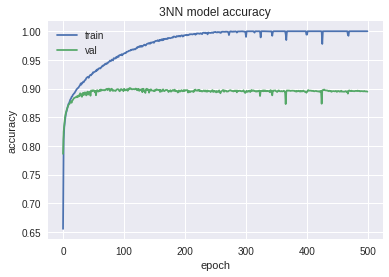

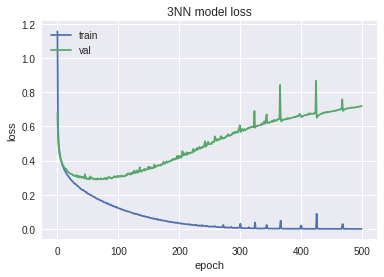

In [222]:
print(history_3NN.history.keys())
# summarize history for accuracy
plt.plot(history_3NN.history['acc'])
plt.plot(history_3NN.history['val_acc'])
plt.title('3NN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('3NN_acc_'+str(epoch_size)+'.png', dpi=300)
plt.show()
# summarize history for loss
plt.plot(history_3NN.history['loss'])
plt.plot(history_3NN.history['val_loss'])
plt.title('3NN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('3NN_loss_'+str(epoch_size)+'.png', dpi=300)
plt.show()

In [223]:
# download the figures from the local directory
from google.colab import files

files.download('3NN_acc_'+str(epoch_size)+'.png')
files.download('3NN_loss_'+str(epoch_size)+'.png')

In [224]:
# change input data for CNN
img_rows = 28
img_cols = 28
input_shape = (img_rows, img_cols, 1)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

In [225]:
# define 3CNN network
model_3CNN = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    Dropout(0.2),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

In [226]:
# check 3CNN network
model_3CNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 3, 3, 128)         73856     
__________

In [227]:
# set the optimizer, loss and metric
model_3CNN.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=learning_rate),
              metrics=['accuracy'])

In [0]:
# train the network and save the metrics to history
history_3CNN = model_3CNN.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epoch_size,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/500
48000/48000 [==============================] - 7s 136us/step - loss: 1.8106 - acc: 0.3838 - val_loss: 1.0564 - val_acc: 0.6507
Epoch 2/500
48000/48000 [==============================] - 5s 106us/step - loss: 0.9917 - acc: 0.6340 - val_loss: 0.7893 - val_acc: 0.7232
Epoch 3/500
48000/48000 [==============================] - 5s 106us/step - loss: 0.8182 - acc: 0.6987 - val_loss: 0.6852 - val_acc: 0.7463
Epoch 4/500
43008/48000 [=========================>....] - ETA: 0s - loss: 0.7369 - acc: 0.7249

48000/48000 [==============================] - 5s 103us/step - loss: 0.7351 - acc: 0.7264 - val_loss: 0.6303 - val_acc: 0.7667
Epoch 5/500
48000/48000 [==============================] - 5s 101us/step - loss: 0.6803 - acc: 0.7440 - val_loss: 0.5933 - val_acc: 0.7763
Epoch 6/500
48000/48000 [==============================] - 5s 102us/step - loss: 0.6446 - acc: 0.7585 - val_loss: 0.5642 - val_acc: 0.7876
Epoch 7/500
48000/48000 [==============================] - 5s 99us/step - loss: 0.6184 - acc: 0.7674 - val_loss: 0.5454 - val_acc: 0.7951
Epoch 8/500
47616/48000 [============================>.] - ETA: 0s - loss: 0.5972 - acc: 0.7752

48000/48000 [==============================] - 5s 98us/step - loss: 0.5969 - acc: 0.7754 - val_loss: 0.5259 - val_acc: 0.8010
Epoch 9/500
48000/48000 [==============================] - 5s 100us/step - loss: 0.5767 - acc: 0.7842 - val_loss: 0.5054 - val_acc: 0.8102
Epoch 10/500
48000/48000 [==============================] - 5s 100us/step - loss: 0.5584 - acc: 0.7899 - val_loss: 0.4947 - val_acc: 0.8168
Epoch 11/500
48000/48000 [==============================] - 5s 99us/step - loss: 0.5421 - acc: 0.7972 - val_loss: 0.4817 - val_acc: 0.8178
Epoch 12/500
46592/48000 [============================>.] - ETA: 0s - loss: 0.5325 - acc: 0.8015

48000/48000 [==============================] - 5s 99us/step - loss: 0.5318 - acc: 0.8019 - val_loss: 0.4667 - val_acc: 0.8285
Epoch 13/500
48000/48000 [==============================] - 5s 99us/step - loss: 0.5208 - acc: 0.8048 - val_loss: 0.4569 - val_acc: 0.8319
Epoch 14/500
48000/48000 [==============================] - 5s 98us/step - loss: 0.5048 - acc: 0.8126 - val_loss: 0.4464 - val_acc: 0.8334
Epoch 15/500
48000/48000 [==============================] - 5s 100us/step - loss: 0.4965 - acc: 0.8160 - val_loss: 0.4383 - val_acc: 0.8368
Epoch 16/500
48000/48000 [==============================] - 5s 100us/step - loss: 0.4866 - acc: 0.8201 - val_loss: 0.4293 - val_acc: 0.8431
Epoch 17/500
  512/48000 [..............................] - ETA: 4s - loss: 0.5130 - acc: 0.8066

48000/48000 [==============================] - 5s 98us/step - loss: 0.4794 - acc: 0.8252 - val_loss: 0.4234 - val_acc: 0.8444
Epoch 18/500
48000/48000 [==============================] - 5s 97us/step - loss: 0.4721 - acc: 0.8264 - val_loss: 0.4157 - val_acc: 0.8493
Epoch 19/500
48000/48000 [==============================] - 5s 97us/step - loss: 0.4632 - acc: 0.8290 - val_loss: 0.4076 - val_acc: 0.8514
Epoch 20/500
48000/48000 [==============================] - 5s 98us/step - loss: 0.4561 - acc: 0.8322 - val_loss: 0.3996 - val_acc: 0.8549
Epoch 21/500
48000/48000 [==============================] - 5s 99us/step - loss: 0.4491 - acc: 0.8349 - val_loss: 0.3971 - val_acc: 0.8568


Epoch 22/500
48000/48000 [==============================] - 5s 100us/step - loss: 0.4431 - acc: 0.8365 - val_loss: 0.3916 - val_acc: 0.8569
Epoch 23/500
48000/48000 [==============================] - 5s 97us/step - loss: 0.4360 - acc: 0.8390 - val_loss: 0.3844 - val_acc: 0.8608
Epoch 24/500
48000/48000 [==============================] - 5s 97us/step - loss: 0.4307 - acc: 0.8408 - val_loss: 0.3784 - val_acc: 0.8627
Epoch 25/500
48000/48000 [==============================] - 5s 98us/step - loss: 0.4247 - acc: 0.8439 - val_loss: 0.3747 - val_acc: 0.8665
Epoch 26/500
43520/48000 [==========================>...] - ETA: 0s - loss: 0.4233 - acc: 0.8439

48000/48000 [==============================] - 5s 97us/step - loss: 0.4236 - acc: 0.8440 - val_loss: 0.3697 - val_acc: 0.8663
Epoch 27/500
48000/48000 [==============================] - 5s 97us/step - loss: 0.4125 - acc: 0.8486 - val_loss: 0.3665 - val_acc: 0.8672
Epoch 28/500
48000/48000 [==============================] - 5s 100us/step - loss: 0.4083 - acc: 0.8505 - val_loss: 0.3616 - val_acc: 0.8696
Epoch 29/500
48000/48000 [==============================] - 5s 98us/step - loss: 0.4051 - acc: 0.8533 - val_loss: 0.3577 - val_acc: 0.8702
Epoch 30/500
48000/48000 [==============================] - 5s 97us/step - loss: 0.3995 - acc: 0.8547 - val_loss: 0.3528 - val_acc: 0.8712
Epoch 31/500
 3584/48000 [=>............................] - ETA: 4s - loss: 0.3922 - acc: 0.8569

48000/48000 [==============================] - 5s 96us/step - loss: 0.3980 - acc: 0.8539 - val_loss: 0.3499 - val_acc: 0.8750
Epoch 32/500
48000/48000 [==============================] - 5s 98us/step - loss: 0.3952 - acc: 0.8550 - val_loss: 0.3456 - val_acc: 0.8745
Epoch 33/500
48000/48000 [==============================] - 5s 97us/step - loss: 0.3885 - acc: 0.8576 - val_loss: 0.3443 - val_acc: 0.8756
Epoch 34/500
48000/48000 [==============================] - 5s 98us/step - loss: 0.3846 - acc: 0.8595 - val_loss: 0.3384 - val_acc: 0.8777
Epoch 35/500
47104/48000 [============================>.] - ETA: 0s - loss: 0.3817 - acc: 0.8597

48000/48000 [==============================] - 5s 98us/step - loss: 0.3814 - acc: 0.8597 - val_loss: 0.3360 - val_acc: 0.8788
Epoch 36/500
48000/48000 [==============================] - 5s 97us/step - loss: 0.3790 - acc: 0.8624 - val_loss: 0.3355 - val_acc: 0.8787
Epoch 37/500
48000/48000 [==============================] - 5s 97us/step - loss: 0.3771 - acc: 0.8625 - val_loss: 0.3296 - val_acc: 0.8803
Epoch 38/500
48000/48000 [==============================] - 5s 98us/step - loss: 0.3735 - acc: 0.8654 - val_loss: 0.3277 - val_acc: 0.8814
Epoch 39/500
48000/48000 [==============================] - 5s 97us/step - loss: 0.3710 - acc: 0.8638 - val_loss: 0.3254 - val_acc: 0.8828
Epoch 40/500
 7168/48000 [===>..........................] - ETA: 3s - loss: 0.3573 - acc: 0.8700

48000/48000 [==============================] - 5s 99us/step - loss: 0.3639 - acc: 0.8672 - val_loss: 0.3224 - val_acc: 0.8847
Epoch 41/500
48000/48000 [==============================] - 5s 97us/step - loss: 0.3636 - acc: 0.8672 - val_loss: 0.3209 - val_acc: 0.8828
Epoch 42/500
48000/48000 [==============================] - 5s 98us/step - loss: 0.3616 - acc: 0.8672 - val_loss: 0.3175 - val_acc: 0.8865
Epoch 43/500
48000/48000 [==============================] - 5s 97us/step - loss: 0.3561 - acc: 0.8691 - val_loss: 0.3149 - val_acc: 0.8862
Epoch 44/500
48000/48000 [==============================] - 5s 97us/step - loss: 0.3521 - acc: 0.8715 - val_loss: 0.3115 - val_acc: 0.8875
Epoch 45/500
 1536/48000 [..............................] - ETA: 4s - loss: 0.3419 - acc: 0.8698

48000/48000 [==============================] - 5s 96us/step - loss: 0.3520 - acc: 0.8729 - val_loss: 0.3109 - val_acc: 0.8882
Epoch 46/500
48000/48000 [==============================] - 5s 96us/step - loss: 0.3470 - acc: 0.8748 - val_loss: 0.3076 - val_acc: 0.8892
Epoch 47/500
48000/48000 [==============================] - 5s 98us/step - loss: 0.3457 - acc: 0.8739 - val_loss: 0.3066 - val_acc: 0.8897
Epoch 48/500
48000/48000 [==============================] - 5s 97us/step - loss: 0.3418 - acc: 0.8759 - val_loss: 0.3040 - val_acc: 0.8899
Epoch 49/500
48000/48000 [==============================] - 5s 97us/step - loss: 0.3399 - acc: 0.8752 - val_loss: 0.3021 - val_acc: 0.8901
Epoch 50/500
 1536/48000 [..............................] - ETA: 4s - loss: 0.3562 - acc: 0.8646

48000/48000 [==============================] - 5s 96us/step - loss: 0.3394 - acc: 0.8773 - val_loss: 0.2994 - val_acc: 0.8915
Epoch 51/500
48000/48000 [==============================] - 5s 96us/step - loss: 0.3358 - acc: 0.8779 - val_loss: 0.2972 - val_acc: 0.8924
Epoch 52/500
48000/48000 [==============================] - 5s 95us/step - loss: 0.3342 - acc: 0.8774 - val_loss: 0.2987 - val_acc: 0.8919
Epoch 53/500
48000/48000 [==============================] - 5s 96us/step - loss: 0.3341 - acc: 0.8778 - val_loss: 0.2960 - val_acc: 0.8913
Epoch 54/500
48000/48000 [==============================] - 5s 97us/step - loss: 0.3300 - acc: 0.8801 - val_loss: 0.2919 - val_acc: 0.8922
Epoch 55/500
 3584/48000 [=>............................] - ETA: 4s - loss: 0.3219 - acc: 0.8789

48000/48000 [==============================] - 5s 96us/step - loss: 0.3269 - acc: 0.8816 - val_loss: 0.2893 - val_acc: 0.8939
Epoch 56/500
48000/48000 [==============================] - 5s 96us/step - loss: 0.3216 - acc: 0.8822 - val_loss: 0.2882 - val_acc: 0.8950
Epoch 57/500
48000/48000 [==============================] - 5s 95us/step - loss: 0.3263 - acc: 0.8798 - val_loss: 0.2861 - val_acc: 0.8953
Epoch 58/500
48000/48000 [==============================] - 5s 96us/step - loss: 0.3214 - acc: 0.8829 - val_loss: 0.2869 - val_acc: 0.8948
Epoch 59/500
48000/48000 [==============================] - 5s 96us/step - loss: 0.3182 - acc: 0.8839 - val_loss: 0.2832 - val_acc: 0.8957
Epoch 60/500
 4608/48000 [=>............................] - ETA: 3s - loss: 0.3009 - acc: 0.8900

48000/48000 [==============================] - 5s 98us/step - loss: 0.3173 - acc: 0.8841 - val_loss: 0.2856 - val_acc: 0.8948
Epoch 61/500
48000/48000 [==============================] - 5s 97us/step - loss: 0.3171 - acc: 0.8834 - val_loss: 0.2831 - val_acc: 0.8956
Epoch 62/500
48000/48000 [==============================] - 5s 95us/step - loss: 0.3150 - acc: 0.8860 - val_loss: 0.2808 - val_acc: 0.8974
Epoch 63/500
48000/48000 [==============================] - 5s 96us/step - loss: 0.3114 - acc: 0.8865 - val_loss: 0.2786 - val_acc: 0.8967
Epoch 64/500
48000/48000 [==============================] - 5s 96us/step - loss: 0.3117 - acc: 0.8876 - val_loss: 0.2772 - val_acc: 0.8976
Epoch 65/500
 3072/48000 [>.............................] - ETA: 4s - loss: 0.3037 - acc: 0.8857

48000/48000 [==============================] - 5s 98us/step - loss: 0.3069 - acc: 0.8863 - val_loss: 0.2775 - val_acc: 0.8976
Epoch 66/500
48000/48000 [==============================] - 5s 96us/step - loss: 0.3065 - acc: 0.8897 - val_loss: 0.2737 - val_acc: 0.8987
Epoch 67/500
48000/48000 [==============================] - 5s 98us/step - loss: 0.3043 - acc: 0.8883 - val_loss: 0.2728 - val_acc: 0.8994
Epoch 68/500
48000/48000 [==============================] - 5s 96us/step - loss: 0.3017 - acc: 0.8906 - val_loss: 0.2728 - val_acc: 0.9007
Epoch 69/500
23552/48000 [=============>................] - ETA: 2s - loss: 0.3065 - acc: 0.8893

In [204]:
# Check the test loss and accuracy
score = model_3CNN.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

('Test loss:', 0.23113659760914743)
('Test accuracy:', 0.9314)


['acc', 'loss', 'val_acc', 'val_loss']


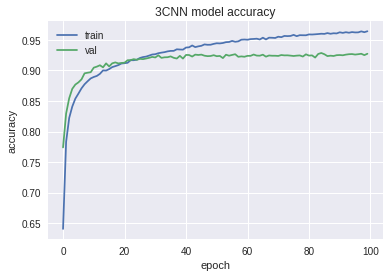

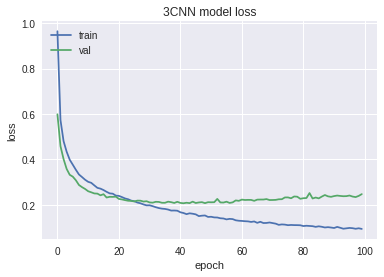

In [205]:
print(history_3CNN.history.keys())
# summarize history for accuracy
plt.plot(history_3CNN.history['acc'])
plt.plot(history_3CNN.history['val_acc'])
plt.title('3CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('3CNN_acc_'+str(epoch_size)+'.png', dpi=300)
plt.show()
# summarize history for loss
plt.plot(history_3CNN.history['loss'])
plt.plot(history_3CNN.history['val_loss'])
plt.title('3CNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('3CNN_loss_'+str(epoch_size)+'.png', dpi=300)

plt.show()

In [206]:
# download the figures from the local directory
from google.colab import files

files.download('3CNN_acc_'+str(epoch_size)+'.png')
files.download('3CNN_loss_'+str(epoch_size)+'.png')


In [0]:
os.listdir("./")